# Group 2
   ### use different ML to predict the adaptbility and evaluate the performance of each model. 
   ### Find the most significant feature to every ML model and use cluster to verify the outcome


## step 1: import models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore" )

## step 2: read file and encoding

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv",encoding='big5')
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


### Choice one-hot encoding or coding into 0/1 to deal with category data

In [3]:
columns = list(df.keys())
# Check out the categories
print('\n')
for e in columns:
    df_value = df[e].unique()
    print(e,':',np.sort(df_value))
    print('-------------------------------------')
print('\n')
print("We know that：")
print("1. 'Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms' are two categories.--> use 0/1 to deal with them.\n")
print("2. 'Age', 'Financial Condition', 'Network Type', 'Class Duration','Adaptivity Level' they are different level.--> use 0~n to replace the words.\n")
print("3. 'Education Level' and 'Device' these two feature can't use 0/1 and they aren't level features.--> use one- hot encoding to deal with them.")



Gender : ['Boy' 'Girl']
-------------------------------------
Age : ['1-5' '11-15' '16-20' '21-25' '26-30' '6-10']
-------------------------------------
Education Level : ['College' 'School' 'University']
-------------------------------------
Institution Type : ['Government' 'Non Government']
-------------------------------------
IT Student : ['No' 'Yes']
-------------------------------------
Location : ['No' 'Yes']
-------------------------------------
Load-shedding : ['High' 'Low']
-------------------------------------
Financial Condition : ['Mid' 'Poor' 'Rich']
-------------------------------------
Internet Type : ['Mobile Data' 'Wifi']
-------------------------------------
Network Type : ['2G' '3G' '4G']
-------------------------------------
Class Duration : ['0' '1-3' '3-6']
-------------------------------------
Self Lms : ['No' 'Yes']
-------------------------------------
Device : ['Computer' 'Mobile' 'Tab']
-------------------------------------
Adaptivity Level : ['High' 'Low'

In [4]:
# 1. Two categories
TwoCat = ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms']
for e in TwoCat:
    categories = df[e]
    df[e] = df[e].astype('category')    
    codes = df[e].cat.codes 
    df[e]= df[e].cat.codes
    print(df[e])
    print('================================')
    name_map = dict(zip(codes, categories))
    print(name_map)

# 2. They are different level ('Age', 'Financial Condition', 'Network Type', 'Class Duration','Adaptivity Level')
df['Age'] = df['Age'].map({ "1-5":0, "6-10":1, "11-15":2, "16-20":3, "21-25":4, "26-30":5 })
df['Financial Condition'] = df['Financial Condition'].map({'Poor':0 , 'Mid':1, 'Rich':2});
df['Network Type'] = df['Network Type'].map({'2G':0, '3G':1, '4G':2})
df['Class Duration'] = df['Class Duration'].map({'0':0, '1-3':1, '3-6':2})
df['Adaptivity Level'] = df['Adaptivity Level'].map({'Low':0, 'Moderate':1, 'High':2})
df

# 3. Non of above, use one-hot encoding
OneHotCode = ['Education Level','Device']

df_onehot = pd.get_dummies(df, columns=OneHotCode, prefix='')
df_onehot

print('\n----------Complete the conversion of the string into a numeric representation.----------\n')
display(df_onehot)

0       0
1       1
2       1
3       1
4       1
       ..
1200    1
1201    1
1202    0
1203    1
1204    1
Name: Gender, Length: 1205, dtype: int8
{0: 'Boy', 1: 'Girl'}
0       1
1       1
2       0
3       1
4       1
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: Institution Type, Length: 1205, dtype: int8
{1: 'Non Government', 0: 'Government'}
0       0
1       0
2       0
3       0
4       0
       ..
1200    0
1201    0
1202    0
1203    0
1204    0
Name: IT Student, Length: 1205, dtype: int8
{0: 'No', 1: 'Yes'}
0       1
1       1
2       1
3       1
4       1
       ..
1200    1
1201    0
1202    1
1203    0
1204    1
Name: Location, Length: 1205, dtype: int8
{1: 'Yes', 0: 'No'}
0       1
1       0
2       1
3       1
4       1
       ..
1200    1
1201    0
1202    1
1203    1
1204    1
Name: Load-shedding, Length: 1205, dtype: int8
{1: 'Low', 0: 'High'}
0       1
1       0
2       1
3       0
4       0
       ..
1200    1
1201    1
1202    0
1203    1
1204

,Gender,Age,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Adaptivity Level,_College,_School,_University,_Computer,_Mobile,_Tab
0,0,4,1,0,1,1,1,1,2,2,0,1,0,0,1,0,0,1
1,1,4,1,0,1,0,1,0,2,1,1,1,0,0,1,0,1,0
2,1,3,0,0,1,1,1,1,2,1,0,1,1,0,0,0,1,0
3,1,2,1,0,1,1,1,0,2,1,0,1,0,1,0,0,1,0
4,1,3,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,3,1,0,1,1,1,1,2,1,0,0,1,0,0,0,1,0
1201,1,3,1,0,0,0,1,1,2,2,0,1,1,0,0,0,1,0
1202,0,2,1,0,1,1,1,0,1,1,0,1,0,1,0,0,1,0
1203,1,3,1,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0


In [5]:
# set columns names
names = df_onehot.drop( columns=["Adaptivity Level"] ).columns

label_adaptivity = [ 'Low', 'Moderate', 'High' ]

## step 3: use different ML to predict the adaptbility and evaluate the performance of each model.

In [6]:
def Report( y_test, y_pred ) :
    print( "show the confusion_matrix and classification_report\n" )
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred), "\n")

def CrossValScore( model, scoring='accuracy' ) :
    print( "Cross validation\n" )
    # cross_val_score
    scores = cross_val_score( model, X, y, cv=10, scoring=scoring ) # cv=10 指切成十等分
    print(scores, "\n")
    print(scores.mean(), "\n")

def ClassifierCoef( model ) :
    #coef 
    model_coef = model.coef_
    plt.figure( figsize=(10, 10) )
    for i in range( 0, 3 ) :
        plt.plot( range( len( names ) ), model_coef[i].T, label=label_adaptivity[i] )
    plt.legend( loc="best" )

    #set xticks and ylabels
    plt.xticks( range( len( names ) ), names, rotation=90 )
    plt.ylabel( "Coefficients" )
    plt.show()
    
def RegressionCoef( model ):
    #coef 
    model_coef = model.coef_
    plt.figure( figsize=(10, 10) )
    plt.plot( range( len( names ) ), model_coef )

    #set xticks and ylabels
    plt.xticks( range( len( names ) ), names, rotation=90 )
    plt.ylabel( "Coefficients" )
    plt.show()
    

## 1. Classifiers：KNN

#### find the suitable k value

In [7]:
#define X and y
X = df_onehot.drop('Adaptivity Level', axis = 1).values
y = df_onehot['Adaptivity Level'].values

# see their shape is the same or not
print(X.shape)
print(y.shape)

# split X, y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

(1205, 17)
(1205,)


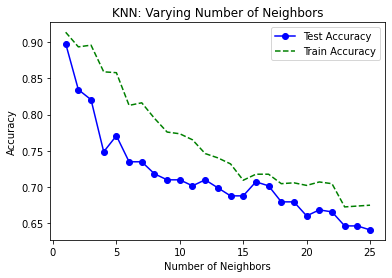

In [8]:
#list等等存放個數值
test_score = []
train_score = []

#用loop跑，並將數值加入list中
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score.append(knn.score(X_test, y_test))
    train_score.append(knn.score(X_train, y_train))

#圖的參數設置
x = np.arange(1,26) # x軸
plt.plot(x,test_score,'b-o',label='Test Accuracy') # Test Acuracy
plt.plot(x,train_score,'g--',label='Train Accuracy') # Train Accuracy
plt.xlabel('Number of Neighbors') # xlabel
plt.ylabel('Accuracy') # yleabel
plt.legend() #線的說明
plt.title('KNN: Varying Number of Neighbors') #title
plt.show() #show出圖片

#### use cross validation find the suitable k value

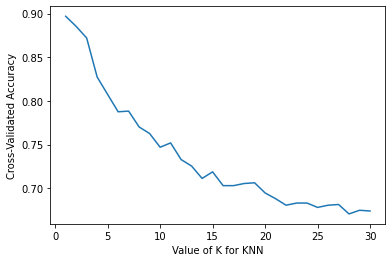

In [9]:
# 改變n_neighbors
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot( k_range, k_scores )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### choice k = 3

In [10]:
# cross_val_score
knn = KNeighborsClassifier( n_neighbors = 3 )
CrossValScore( knn )

Cross validation

[0.91735537 0.90082645 0.85123967 0.92561983 0.8677686  0.875
 0.85       0.825      0.86666667 0.84166667] 

0.8721143250688705 



In [11]:
#define model name
knn = KNeighborsClassifier( n_neighbors = 3 )
#put into model
knn.fit(X_train, y_train)

#得出預測值，並print出來
y_pred = knn.predict(X_test)
print('y_pred：',y_pred)

#計算準確率
print('Acuracy',knn.score(X_test,y_test))

y_pred： [1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 2 1 0 1 0 0 0 0 2 0 1 2 1
 1 0 1 0 0 1 2 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 2 0 1 2 1 0 1 2 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 0 2 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 2 0 1 0
 1 0 1 0 2 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 2 0 2 1 1 1
 1 0 0 2 1 1 1 1 1 0 1 2 1 1 1 2 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0
 1 2 1 0 1 1 1 1 1 0 0 1 0 2 0 0 0 0 0 1 2 0 1 0 0 0 0 1 1 1 1 0 1 2 0 1 1
 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 2 1 1
 0 1 0 2 1 0 1 2 1 0 0 2 0 1 1 1 1 0 0 2 1 0 0 0 1 0 0 1 1]
Acuracy 0.8204419889502762


In [12]:
Report( y_test, y_pred )

show the confusion_matrix and classification_report

[[123  21   0]
 [ 30 154   4]
 [  4   6  20]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       144
           1       0.85      0.82      0.83       188
           2       0.83      0.67      0.74        30

    accuracy                           0.82       362
   macro avg       0.82      0.78      0.80       362
weighted avg       0.82      0.82      0.82       362
 



## 2. Classifiers：logistic regression

In [13]:
# (1) name/ define
logr = LogisticRegression(C=1000.0, random_state=42,max_iter=10000)
# (2) train
logr.fit(X_train, y_train) #訓練
# (3) predict
y_pred = logr.predict(X_test)

print('Accuracy: %.2f\n' % accuracy_score(y_test, y_pred))
np.set_printoptions( suppress = True ) #去掉自然常數e
print( "proba:\n", logr.predict_proba(X_test) ) #只有logr才有這個function


Accuracy: 0.70

proba:
 [[0.14691423 0.79041036 0.0626754 ]
 [0.95652173 0.04290018 0.00057809]
 [0.31678331 0.67667428 0.00654241]
 ...
 [0.91205767 0.08624602 0.00169631]
 [0.11968856 0.73378496 0.14652649]
 [0.31341319 0.47240112 0.21418569]]


In [14]:
CrossValScore( logr )
Report( y_test, y_pred )

Cross validation

[0.79338843 0.7107438  0.73553719 0.66942149 0.74380165 0.64166667
 0.725      0.65833333 0.75       0.625     ] 

0.7052892561983471 

show the confusion_matrix and classification_report

[[100  44   0]
 [ 37 151   0]
 [  7  20   3]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       144
           1       0.70      0.80      0.75       188
           2       1.00      0.10      0.18        30

    accuracy                           0.70       362
   macro avg       0.80      0.53      0.54       362
weighted avg       0.72      0.70      0.68       362
 



### Coeficient

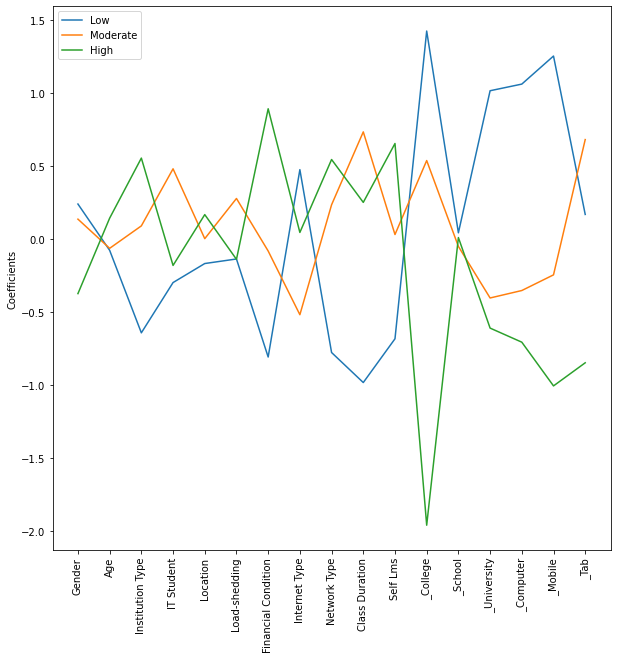

In [15]:
ClassifierCoef( logr )

    Observe the influence of each feature for three different Adaptivity Levels. 
    
    for example:
    Whether the Education Level is College has a more obvious influence on the three levels. If it is College, the
    more likely it is Low; if it is not College, the more likely it is High.
    
    Whether the Education Level is School has no obvious impact on the three levels.
    
    The shorter the Class Duration time, the more likely it is Low.

## 3. Classifiers：SVM (線性)

In [16]:
# 線性 kernel='linear'

svm = SVC(kernel= "linear", random_state=42) # 線性 kernel='linear'
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.66


In [17]:
CrossValScore( svm )
Report( y_test, y_pred )

Cross validation

[0.7768595  0.66115702 0.68595041 0.65289256 0.69421488 0.64166667
 0.69166667 0.63333333 0.75       0.64166667] 

0.6829407713498623 

show the confusion_matrix and classification_report

[[ 90  54   0]
 [ 40 148   0]
 [  7  23   0]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       144
           1       0.66      0.79      0.72       188
           2       0.00      0.00      0.00        30

    accuracy                           0.66       362
   macro avg       0.44      0.47      0.45       362
weighted avg       0.60      0.66      0.63       362
 



### Coeficient

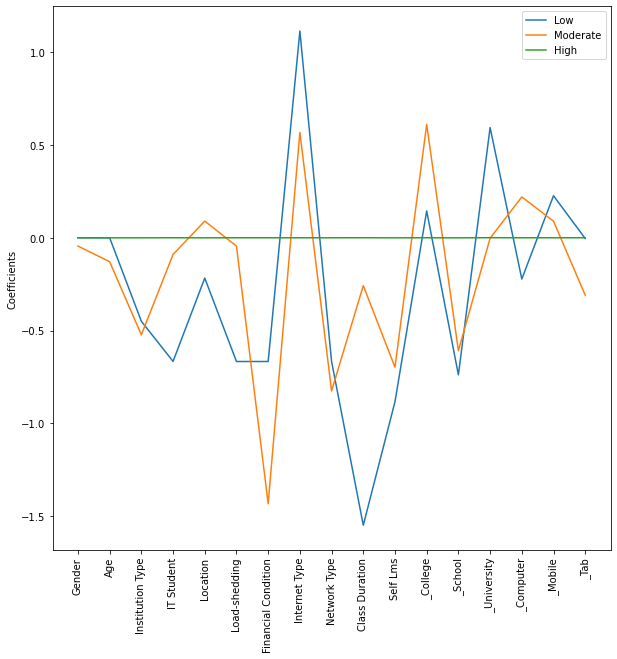

In [18]:
ClassifierCoef( svm )

    Observe the influence of each feature for three different Adaptivity Levels. 

    for example:
    
    The lower the Financial Condition, the higher the probability that it is Moderate. 
    
    The lower the Class Duration, the higher the probability that it is Low.

## 3. Classifiers：SVM (非線性)

In [19]:
# 非線性 kernel='rbf'

svm = SVC(kernel="rbf", random_state=0, gamma=10, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90


In [20]:
CrossValScore( svm )
Report( y_test, y_pred )

Cross validation

[0.94214876 0.92561983 0.92561983 0.94214876 0.87603306 0.91666667
 0.90833333 0.875      0.89166667 0.89166667] 

0.909490358126722 

show the confusion_matrix and classification_report

[[126  18   0]
 [ 10 176   2]
 [  0   6  24]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       144
           1       0.88      0.94      0.91       188
           2       0.92      0.80      0.86        30

    accuracy                           0.90       362
   macro avg       0.91      0.87      0.89       362
weighted avg       0.90      0.90      0.90       362
 



## 4. Classifier: Decision Tree

In [21]:
# (1)
tr = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
# 常見的資訊量有兩種：熵(entropy) 以及 Gini不純度(gini Impurity)
# (2)
tr.fit(X_train, y_train)
# (3)
y_pred=tr.predict(X_test)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


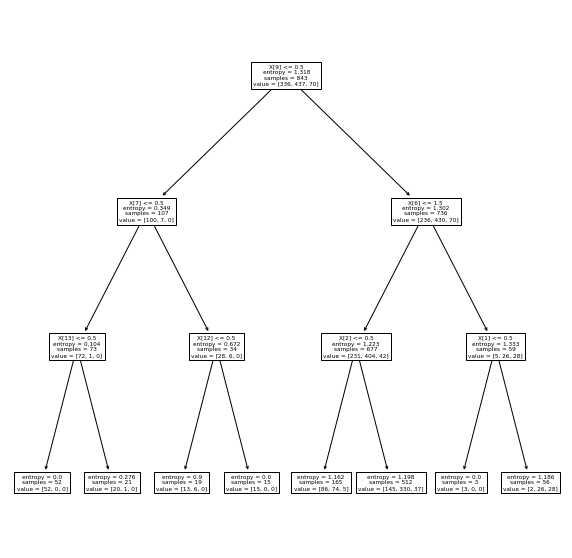

In [22]:
# the tree plot
plt.figure( figsize=(10,10) )
plot_tree(tr)
plt.show()

In [23]:
CrossValScore( tr )
Report( y_test, y_pred )

Cross validation

[0.76033058 0.70247934 0.59504132 0.63636364 0.63636364 0.59166667
 0.66666667 0.58333333 0.73333333 0.61666667] 

0.6522245179063362 

show the confusion_matrix and classification_report

[[ 85  56   3]
 [ 37 144   7]
 [  4  12  14]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       144
           1       0.68      0.77      0.72       188
           2       0.58      0.47      0.52        30

    accuracy                           0.67       362
   macro avg       0.65      0.61      0.62       362
weighted avg       0.67      0.67      0.67       362
 



In [24]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 歸一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上顯示圖像
    plt.title(title)    # 圖像標題
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 將標籤印在x軸座標上
    plt.yticks(num_local, labels_name)    # 將標籤印在y軸座標上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

[[ 85  56   3]
 [ 37 144   7]
 [  4  12  14]]


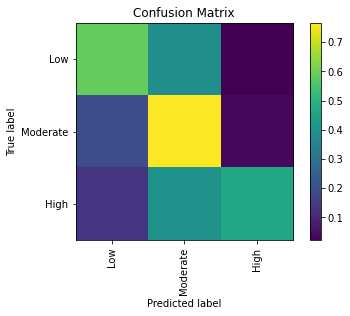

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm, label_adaptivity, "Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

## 5. Classifier: Random Forests

In [26]:
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=50, 
                                random_state=1,
                                n_jobs=2)
# n_estimators樹木量
# n_jobs電腦的核心
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [27]:
CrossValScore( forest )
Report( y_test, y_pred )

Cross validation

[0.95041322 0.95041322 0.90909091 0.94214876 0.87603306 0.91666667
 0.90833333 0.875      0.88333333 0.86666667] 

0.9078099173553719 

show the confusion_matrix and classification_report

[[136   8   0]
 [ 15 169   4]
 [  0   6  24]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       144
           1       0.92      0.90      0.91       188
           2       0.86      0.80      0.83        30

    accuracy                           0.91       362
   macro avg       0.89      0.88      0.89       362
weighted avg       0.91      0.91      0.91       362
 



### Coeficient

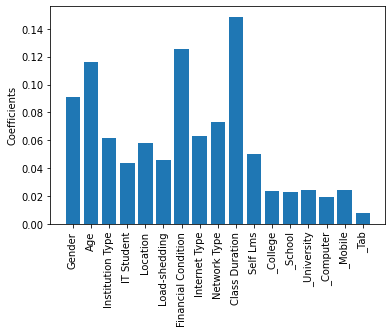

In [28]:
# Finding the impotances of each features vis .feature_importances_
plt.bar( names, forest.feature_importances_.tolist() )
plt.xticks( range( len( names ) ), names, rotation=90 )
plt.ylabel( "Coefficients" )
plt.show()

    Observe the influence of each feature.

    Class Duration has the highest influence on Adaptivity Level, followed by Finacial Condition.

    The least influential is whether the Device is Tab.

## 6. Regression: Linear Regression

In [29]:
linr = LinearRegression()
# (2) train the model using(X,y)
linr.fit(X_train, y_train)
# (3) use the model to predict
y_pred = linr.predict(X_test)

print( "R-Squared:", linr.score(X_test, y_test) )

R-Squared: 0.25816260576057404


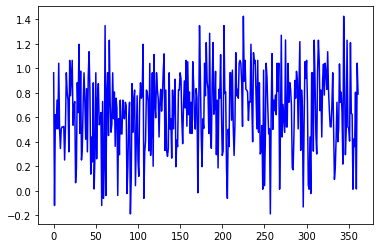

In [30]:
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")

In [31]:
CrossValScore( linr, scoring='r2' )

Cross validation

[0.27718531 0.295742   0.20848395 0.22927302 0.28777595 0.15602768
 0.31908049 0.19256807 0.31182977 0.12161248] 

0.2399578710584147 



In [32]:
# Return the coefficient of determination of the prediction.
# R-Squared
# 模型績效 mse R2
mse = np.mean((linr.predict(X)-y)**2)
r_squared = linr.score(X,y)
adj_r_squared = r_squared-(1-r_squared)*(X.shape[1]/(X.shape[0]-X.shape[1]-1))

# 印出模型績效
print("R_squared", r_squared)
print("adj_R_squared", adj_r_squared)
print("MSE:", mse)

R_squared 0.25771563431075073
adj_R_squared 0.2470847714491524
MSE: 0.2834639078353945


### Coeficient

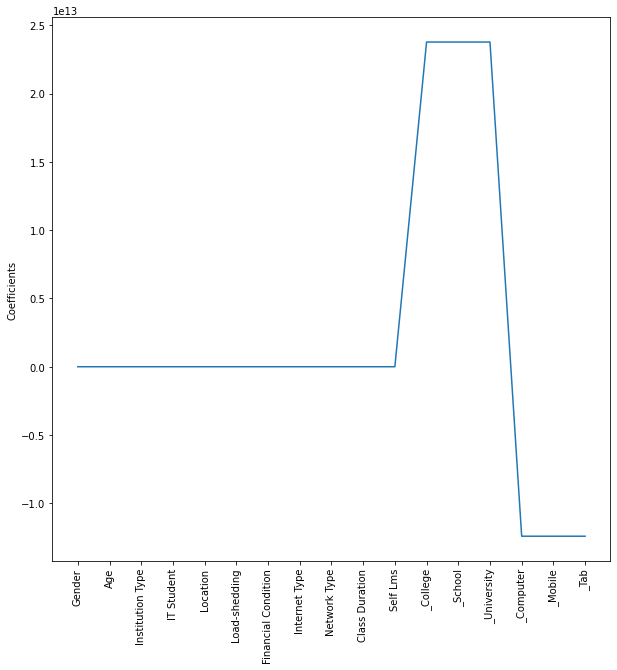

In [33]:
RegressionCoef( linr )

    Observe the influence of each feature. 
    Education Level has the highest influence on Adaptivity Level, followed by Device.

## 7. Regression: Ridge

In [34]:
def my_round(number):
    return round(number, 3)

In [35]:
#define model name.
ridge = Ridge(alpha = 0.1, normalize = True)
#fit the model.
ridge.fit(X_train, y_train)
#predict the target.
y_pred = ridge.predict(X_test)

print(list(map(my_round, y_pred)))

[0.925, -0.068, 0.617, 0.516, 0.733, 0.516, 0.988, 0.549, 0.449, 0.516, 0.515, 0.548, 0.49, 0.306, 0.49, 0.919, 0.771, 0.736, 0.37, 1.051, 0.769, 0.885, 1.077, 0.629, 0.73, 0.709, 0.074, 0.204, 0.856, 0.685, 1.19, 0.501, 0.994, 0.306, 0.369, 0.738, 0.925, 0.709, 0.421, 0.816, 0.376, 0.879, 1.071, 0.817, 0.21, 0.431, 0.234, 0.898, 0.04, 0.293, 0.925, 0.309, 0.733, 0.884, 0.555, 0.634, 0.685, -0.068, 0.709, 0.02, 0.221, 1.257, 0.022, 0.778, 0.919, 0.463, 1.199, 0.673, 0.546, 0.523, 0.925, 0.586, 0.778, 0.354, 0.815, 0.674, 0.022, 0.586, 0.315, 0.736, 0.484, 0.484, 0.733, 0.617, 0.586, 0.673, 0.684, 0.07, 0.242, 0.586, 0.673, -0.129, 0.118, 0.823, 0.546, 0.707, 0.802, 0.115, 0.489, 0.769, 0.306, 0.22, 0.706, 0.898, 0.815, 0.769, 1.19, 0.02, 0.37, 0.39, 0.802, 0.783, 0.709, 0.353, 1.006, 0.363, 0.437, 0.919, 0.244, 1.022, 0.716, 0.592, 0.925, 0.849, 0.815, 0.438, 0.709, 0.849, 0.651, 0.769, 0.889, 1.076, 0.321, 0.802, 0.353, 0.325, 0.384, 0.925, 0.549, 0.586, 0.297, 0.802, 0.516, 0.709, 0.

In [36]:
# 準確率 (which is R-square value)
print("R_squared: ", ridge.score(X_test, y_test))

print("MSE: ", mean_squared_error(y_test, y_pred)) # Mean squared error

R_squared:  0.2658122065346048
MSE:  0.2800854382567843


In [37]:
CrossValScore( ridge, scoring="r2" )

Cross validation

[0.27617    0.27883847 0.21171018 0.22782219 0.29838985 0.15599307
 0.31167274 0.19648281 0.29872094 0.14883225] 

0.24046324985189008 



### Coeficient

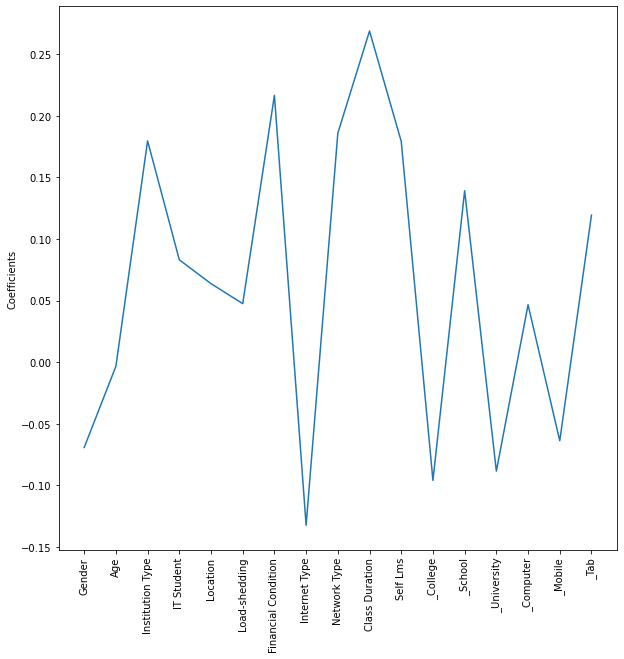

In [38]:
RegressionCoef( ridge )

    Observe the influence of each feature.
    
    Class Duration has the highest influence on Adaptivity Level, followed by Load-shedding. 
    
    The lowest influence is Age. 

## 8. Regression: Lasso

In [39]:
#define model name.
lasso = Lasso(alpha = 0.1)
#fit the model.
lasso.fit(X_train, y_train)
#predict the target.
y_pred = lasso.predict(X_test)

print(list(map(my_round, y_pred)))

[0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.717, 0.683, 0.717, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.717, 0.717, 0.683, 0.717, 0.683, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.717, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.717, 0.683, 0.683, 0.649, 0.683, 0.649, 0.717, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.717, 0.683, 0.649, 0.683, 0.649, 0.683, 0.717, 0.649, 0.683, 0.683, 0.683, 0.717, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.649, 0.683, 0.683, 0.717, 0.683, 0.649, 0.683, 0.717, 0.649, 0.649, 0.717, 0.717, 0.683, 0.717, 0.717, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.649, 0.683, 0.649, 0.683, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.717, 0.683, 0.683, 0.649, 0.683, 0.649, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683, 0.683

In [40]:
# 準確率 (which is R-square value)
print("R_squared: ", lasso.score(X_test, y_test))

print("MSE: ", mean_squared_error(y_test, y_pred))

R_squared:  0.019365560432758278
MSE:  0.3741024152410301


In [41]:
CrossValScore( lasso, scoring="r2" )

Cross validation

[0.01442264 0.00661038 0.02441552 0.01450937 0.01924233 0.01768027
 0.00710409 0.0001272  0.01584782 0.01244914] 

0.013240875972206422 



### Coeficient

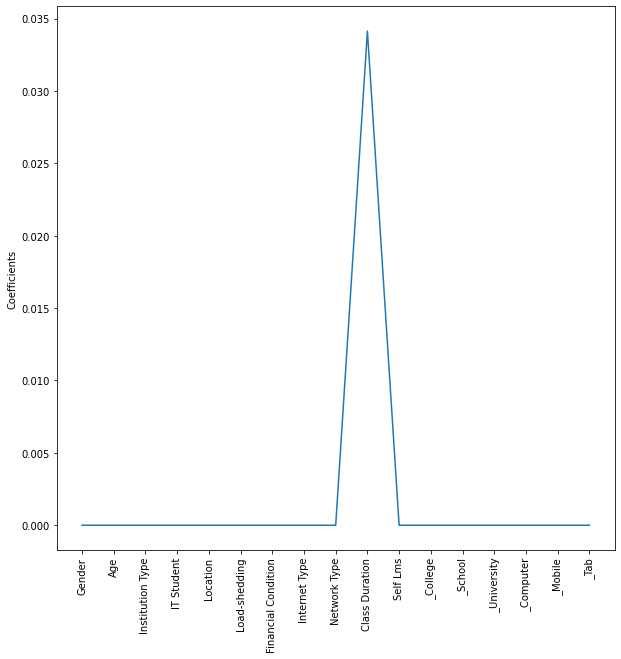

In [42]:
RegressionCoef( lasso )

    Observe the influence of each feature. 
    
    Class Duration has the highest influence on Adaptivity Level. 

Using Classifier to predict, the highest Cross validation Score Mean is nonlinear SVM, its about 0.909. 

Using Regression to predict, they are all very low, and the method with a higher Cross validation Score Mean is Ridge, its about 0.24. 

Summarizing the above methods, the nonlinear SVM has the best performance. And we speculated that Class Duration, Financial Condition and Education Level have a greater influence.

## step 4 : Verify by Cluster

In [43]:
#Use buttom up approach
row_clusters = linkage(df_onehot, method='ward', metric='euclidean')

pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,108.0,0.000000,2.0
cluster 2,1.0,1007.0,0.000000,2.0
cluster 3,2.0,266.0,0.000000,2.0
cluster 4,3.0,51.0,0.000000,2.0
cluster 5,4.0,42.0,0.000000,2.0
...,...,...,...,...
cluster 1200,2395.0,2398.0,19.076156,267.0
cluster 1201,2367.0,2403.0,24.472374,530.0
cluster 1202,2397.0,2404.0,24.797317,449.0
cluster 1203,2402.0,2406.0,32.336163,675.0


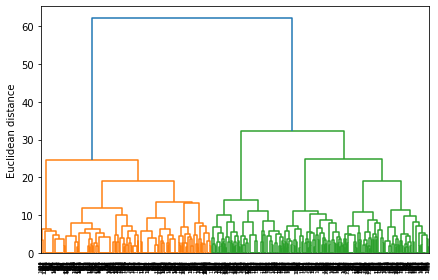

In [44]:
row_dendr = dendrogram(row_clusters, 
                       #labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.xticks( rotation=90 )
plt.show()

We think that dividing into six clusters can be more even.

In [45]:

df_cluster_6 = df_onehot.copy()
cut = cut_tree(row_clusters,6)
df_cluster_6.insert(18, "cluster_6", cut)

df_cluster_6

,Gender,Age,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Adaptivity Level,_College,_School,_University,_Computer,_Mobile,_Tab,cluster_6
0,0,4,1,0,1,1,1,1,2,2,0,1,0,0,1,0,0,1,0
1,1,4,1,0,1,0,1,0,2,1,1,1,0,0,1,0,1,0,1
2,1,3,0,0,1,1,1,1,2,1,0,1,1,0,0,0,1,0,2
3,1,2,1,0,1,1,1,0,2,1,0,1,0,1,0,0,1,0,3
4,1,3,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,3,1,0,1,1,1,1,2,1,0,0,1,0,0,0,1,0,2
1201,1,3,1,0,0,0,1,1,2,2,0,1,1,0,0,0,1,0,2
1202,0,2,1,0,1,1,1,0,1,1,0,1,0,1,0,0,1,0,3
1203,1,3,1,0,0,1,1,1,2,1,0,0,1,0,0,0,1,0,2


In [46]:
# Groupby and verify how the feature infact the adaptivity Level
def ClusterState( df ) :
    print( "--count--" )
    display( df["cluster_6"].value_counts() )
    print( "--mean--" )
    display( df.groupby(["cluster_6"]).mean().T )
    
ClusterState(df_cluster_6)

--count--


3    452
2    226
4    182
0    138
1    129
5     78
Name: cluster_6, dtype: int64

--mean--


cluster_6,0,1,2,3,4,5
Gender,0.246377,0.395349,0.579646,0.424779,0.368132,0.858974
Age,4.043478,3.930233,3.097345,1.973451,4.230769,0.000000
Institution Type,0.920290,1.000000,0.407080,0.785398,0.247253,0.961538
IT Student,0.695652,0.899225,0.132743,0.059735,0.192308,0.000000
Location,0.934783,0.736434,0.575221,0.893805,0.543956,1.000000
Load-shedding,0.884058,0.472868,0.707965,0.931416,0.890110,1.000000
Financial Condition,1.137681,0.806202,0.933628,0.869469,0.758242,0.576923
Internet Type,0.992754,0.441860,0.561947,0.269912,0.296703,0.166667
Network Type,1.898551,1.170543,1.725664,1.500000,1.780220,2.000000
Class Duration,1.608696,1.465116,1.039823,0.896018,0.730769,1.000000


    The highest coef_ before is Class Duration.
    
    Class Duration from high to low is cluster 0->1->2->5->3->4.
    
    Adaptivity Level from high to low is cluster 0->5->3->1->2->4.
    
    The cluster with the highest and lowest Class Duration can correspond to the cluster with the highest and lowest
    Adaptivity Level. 

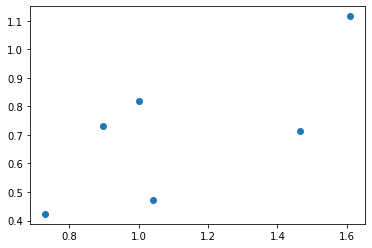

In [47]:
plt.scatter(df_cluster_6[['Class Duration','cluster_6']].groupby(["cluster_6"]).mean(),df_cluster_6[['Adaptivity Level','cluster_6']].groupby(["cluster_6"]).mean(),)
plt.show()

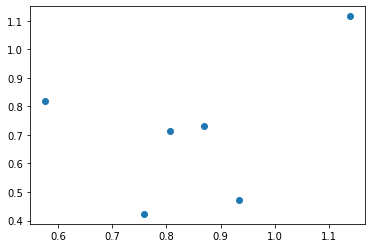

In [48]:
plt.scatter(df_cluster_6[['Financial Condition','cluster_6']].groupby(["cluster_6"]).mean(),df_cluster_6[['Adaptivity Level','cluster_6']].groupby(["cluster_6"]).mean(),)
plt.show()

    From the previous summary we can know, in both Ridge and Lasso and most classifier models, Class Duration is the highest value in coef_, while Financial Condition is the second highest value in most models, so we use these two features for comparison.

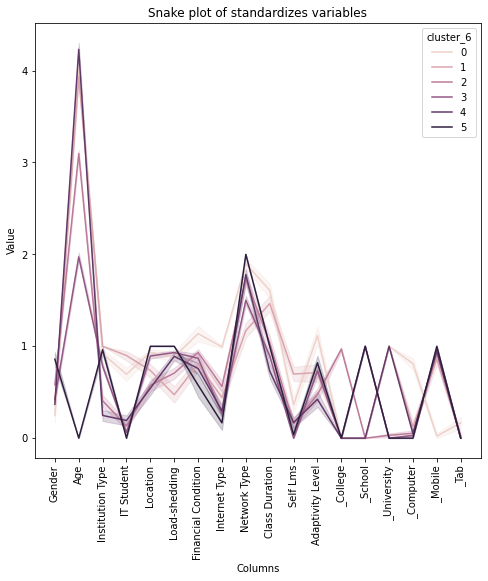

In [49]:
# 蛇型圖
def SnakePlot( df_cluster ) :
    plt.figure( figsize=(8,8) )
    plt.title( "Snake plot of standardizes variables" )
    # Melt data into long format
    df_melt = df_cluster.melt( id_vars=[ "cluster_6" ],
                       value_vars=list(df_onehot.columns), 
                       var_name="Columns", 
                       value_name="Value")
    plt.xticks( rotation=90 )
    plt.ylabel( "Value" )
    sns.lineplot( data=df_melt, x="Columns", y="Value", hue="cluster_6")
    
SnakePlot( df_cluster_6)

We can't see any results from this snake plot. We think maybe this dataset is not suitable for clustering the data and analyzing it with snake plot. 

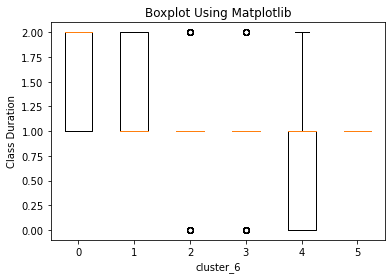

In [50]:
plt.boxplot([df_cluster_6[df_cluster_6["cluster_6"] == 0]['Class Duration'], df_cluster_6[df_cluster_6["cluster_6"] == 1]['Class Duration'], df_cluster_6[df_cluster_6["cluster_6"] == 2]['Class Duration'], df_cluster_6[df_cluster_6["cluster_6"] == 3]['Class Duration'], df_cluster_6[df_cluster_6["cluster_6"] == 4]['Class Duration'], df_cluster_6[df_cluster_6["cluster_6"] == 5]['Class Duration']],  labels = ['0','1','2','3','4','5'])
plt.xlabel("cluster_6")
plt.ylabel("Class Duration")
plt.title("Boxplot Using Matplotlib")
plt.show()

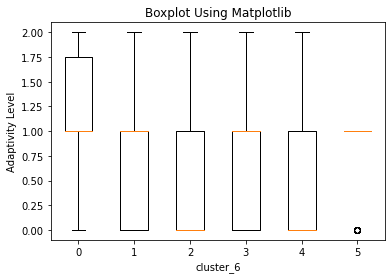

In [51]:
plt.boxplot([df_cluster_6[df_cluster_6["cluster_6"] == 0]['Adaptivity Level'], df_cluster_6[df_cluster_6["cluster_6"] == 1]['Adaptivity Level'], df_cluster_6[df_cluster_6["cluster_6"] == 2]['Adaptivity Level'], df_cluster_6[df_cluster_6["cluster_6"] == 3]['Adaptivity Level'], df_cluster_6[df_cluster_6["cluster_6"] == 4]['Adaptivity Level'], df_cluster_6[df_cluster_6["cluster_6"] == 5]['Adaptivity Level']],  labels = ['0','1','2','3','4','5'])
plt.xlabel("cluster_6")
plt.ylabel("Adaptivity Level")
plt.title("Boxplot Using Matplotlib")
plt.show()

Because the columns of this dataset are not numerical data, boxplot cannot see too much information. 